In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
tokenizer = Tokenizer()

data = open('C:\\Users\91820\Desktop\women.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


print(total_words)


1813


In [3]:
corpus

['who are you?',
 'i am wisdom.',
 'what do you do?',
 'i study and understand women.',
 'first, are you our sort of a person?',
 'do you wear',
 'a glass eye, false teeth or a crutch,',
 'a brace or a hook,',
 'rubber breasts or a rubber crotch,',
 '',
 "stitches to show something's missing? no, no? then",
 'how can we give you a thing?',
 'stop crying.',
 'open your hand.',
 'empty? empty. here is a hand',
 '',
 'to fill it and willing',
 'to bring teacups and roll away headaches',
 'and do whatever you tell it.',
 'will you marry it?',
 'it is guaranteed',
 '',
 'to thumb shut your eyes at the end',
 'and dissolve of sorrow.',
 'we make new stock from the salt.',
 'i notice you are stark naked.',
 'how about this suit——',
 '',
 'black and stiff, but not a bad fit.',
 'will you marry it?',
 'it is waterproof, shatterproof, proof',
 'against fire and bombs through the roof.',
 "believe me, they'll bury you in it.",
 '',
 'now your head, excuse me, is empty.',
 'i have the ticket for t

In [4]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
#model.add(Dense(100 , activation = 'relu'))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 14, 100)           181300    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense (Dense)                (None, 1813)              545713    
Total params: 1,028,213
Trainable params: 1,028,213
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(xs, ys, epochs=50, verbose=1)

Train on 4618 samples
Epoch 1/50
4618/4618 [==============================] - ETA: 0s - loss: 6.8417 - accuracy: 0.03 - 13s 3ms/sample - loss: 6.8425 - accuracy: 0.0381
Epoch 2/50
4618/4618 [==============================] - 6s 1ms/sample - loss: 6.0452 - accuracy: 0.0576
Epoch 3/50
4618/4618 [==============================] - 6s 1ms/sample - loss: 5.2192 - accuracy: 0.1065
Epoch 4/50
4618/4618 [==============================] - 6s 1ms/sample - loss: 4.0924 - accuracy: 0.2020
Epoch 5/50
4618/4618 [==============================] - 6s 1ms/sample - loss: 2.9516 - accuracy: 0.3499
Epoch 6/50
4618/4618 [==============================] - 6s 1ms/sample - loss: 1.9721 - accuracy: 0.5509
Epoch 7/50
4618/4618 [==============================] - 6s 1ms/sample - loss: 1.3183 - accuracy: 0.6975
Epoch 8/50
4618/4618 [==============================] - 6s 1ms/sample - loss: 0.9251 - accuracy: 0.7858
Epoch 9/50
4618/4618 [==============================] - 7s 1ms/sample - loss: 0.7062 - accuracy: 0.8337

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

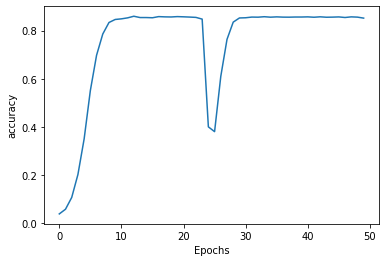

In [9]:
plot_graphs(history, 'accuracy')


In [10]:
seed_text = "who are you"
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

who are you want to the same had to the luck of our these who sleep with editors children to perceive with children no more smelling normal the or these who who have not who believe me twist reading for her own small skull song happen in us with our few decades to
